In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from os.path import join

In [59]:
df = pd.read_excel('rain_data_scaled_datetime.xlsx')
df.head()

,홍수사상번호,연,월,일,시간,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006,7,10,8,2006-7-10 7:00:00,0.008630,0.019488,0.021277,0.019074,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.155043,0.155043
1,1,2006,7,10,9,2006-7-10 8:00:00,0.009926,0.019184,0.021277,0.021798,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.154919,0.154919
2,1,2006,7,10,10,2006-7-10 9:00:00,0.011529,0.019488,0.021277,0.024523,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.154795,0.154795
3,1,2006,7,10,11,2006-7-10 10:00:00,0.013919,0.022229,0.021277,0.027248,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.154719,0.154719
4,1,2006,7,10,12,2006-7-10 11:00:00,0.017731,0.024970,0.021277,0.032698,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.154507,0.154507


/var/folders/vv/vvx773p17_vcvtx6x274kj180000gn/T/ipykernel_59053/2419223097.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,5))
/Users/hhi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hhi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hhi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hhi/opt/anaconda3/lib/python3.8/site-packages/matplotlib

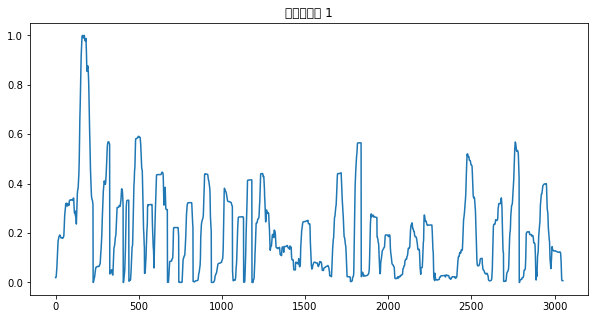

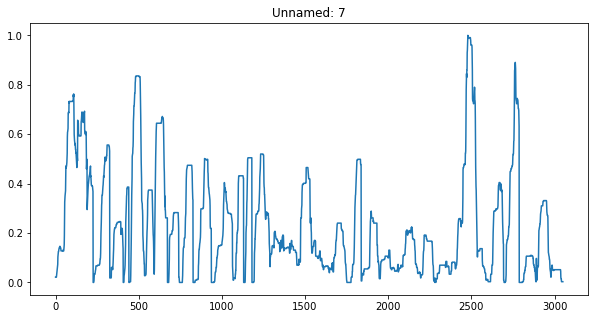

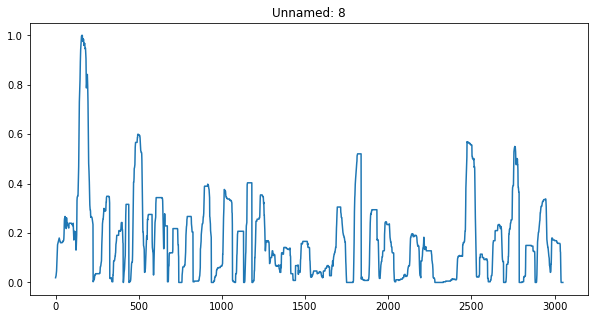

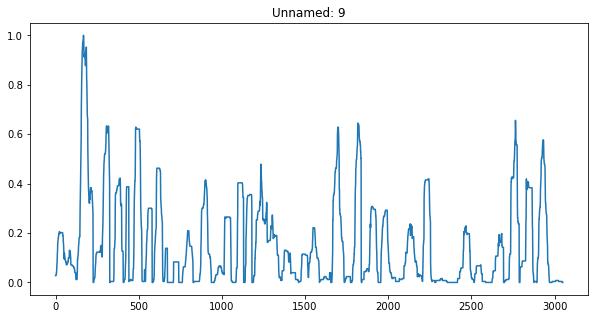

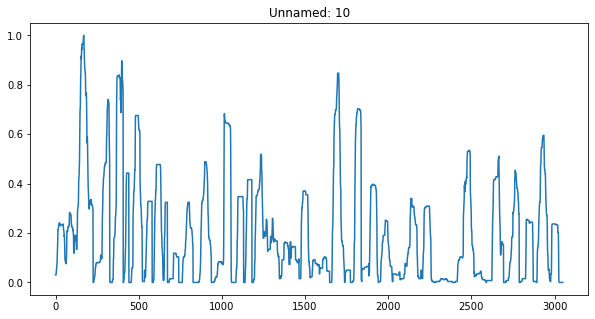

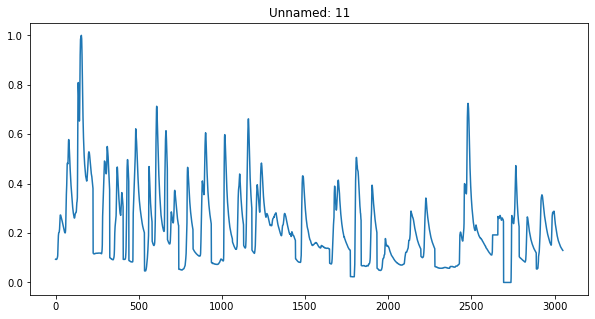

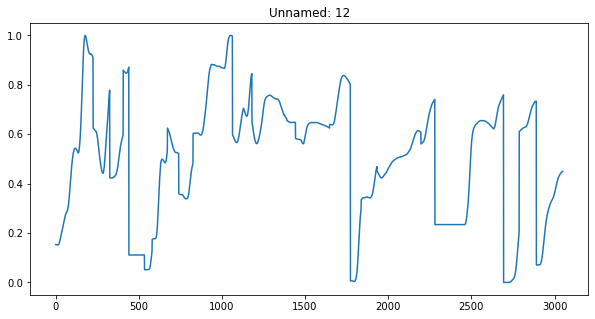

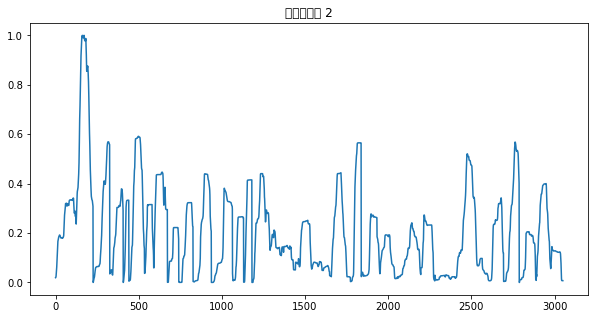

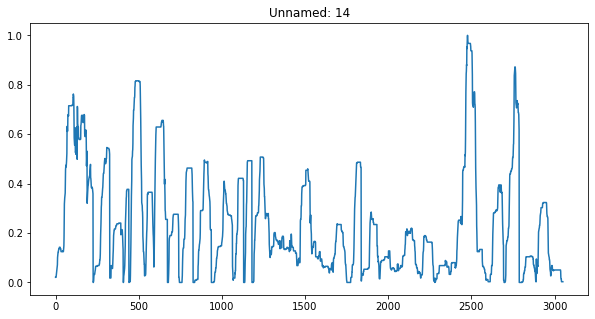

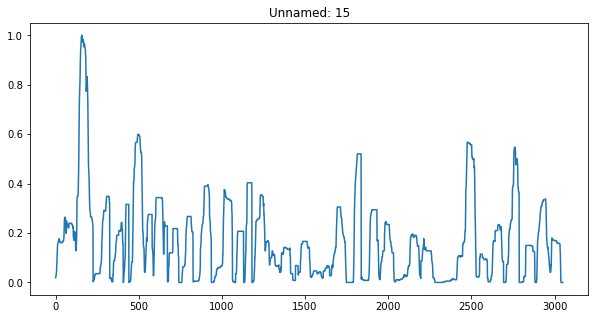

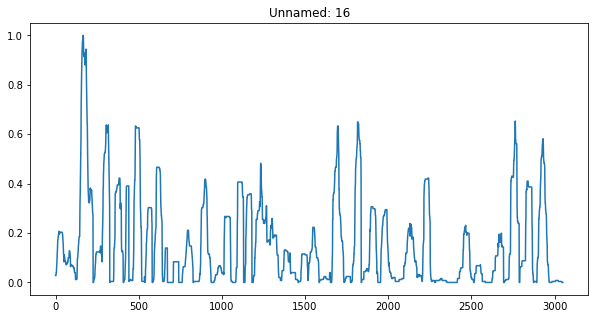

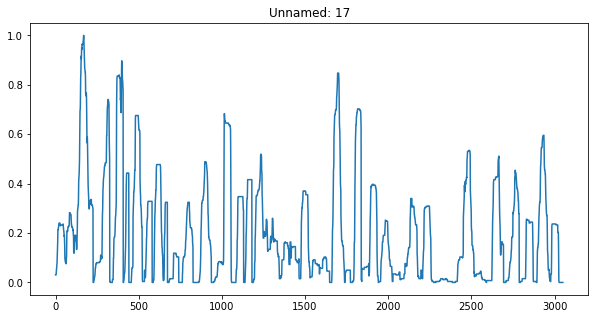

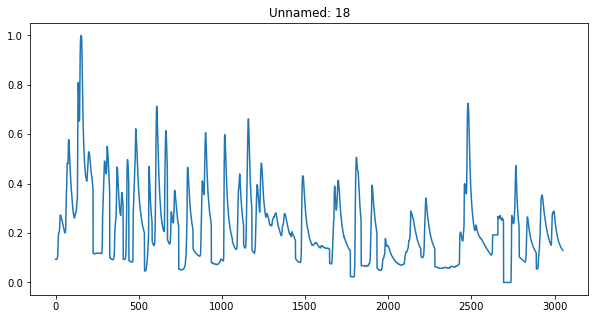

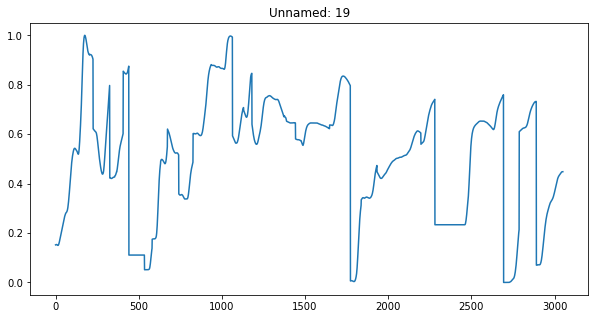

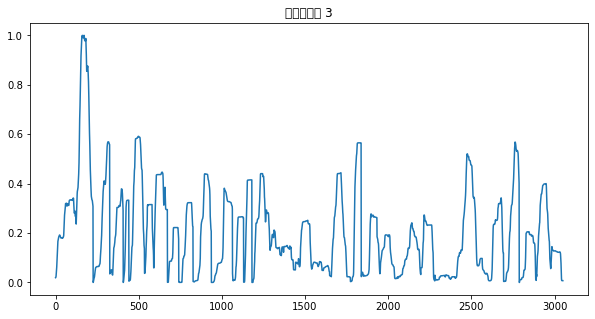

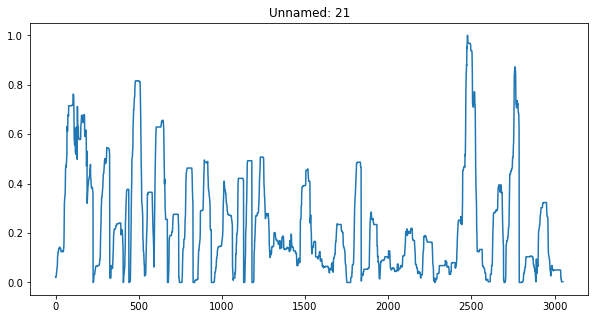

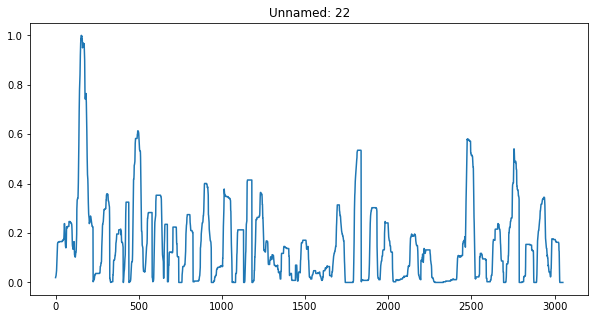

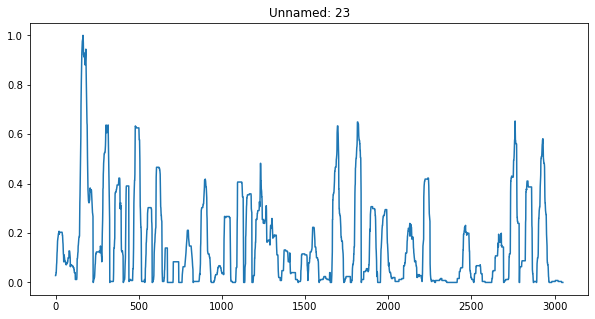

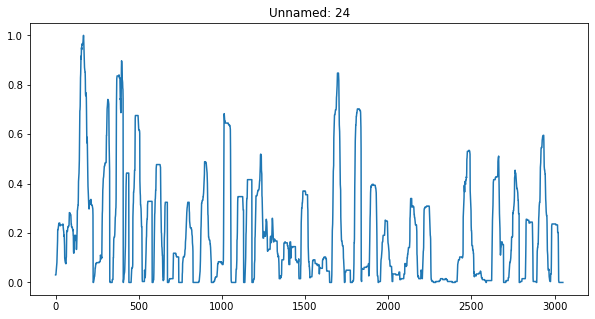

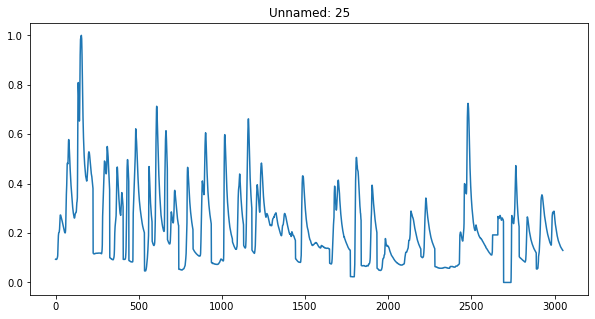

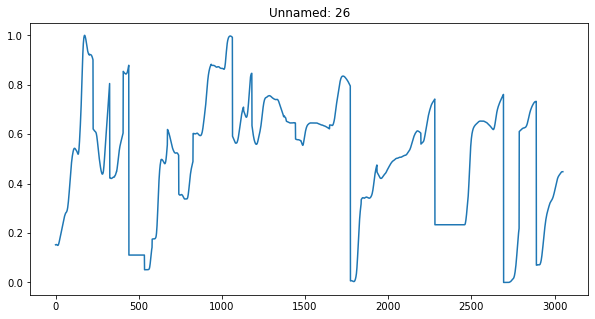

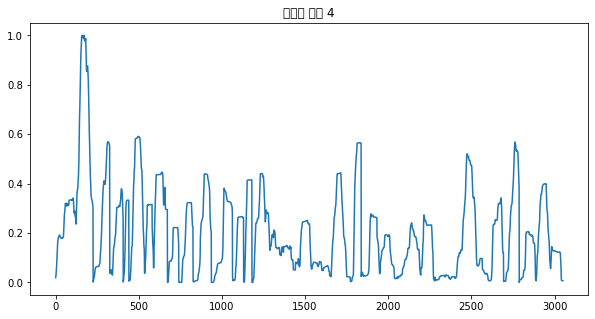

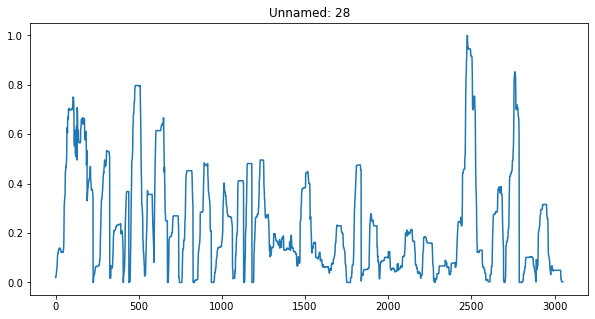

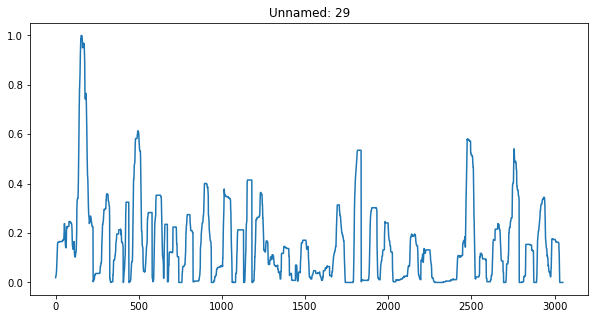

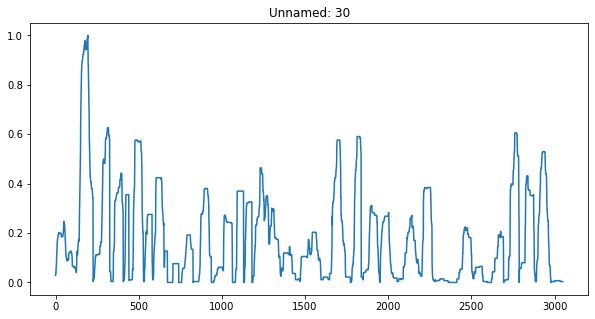

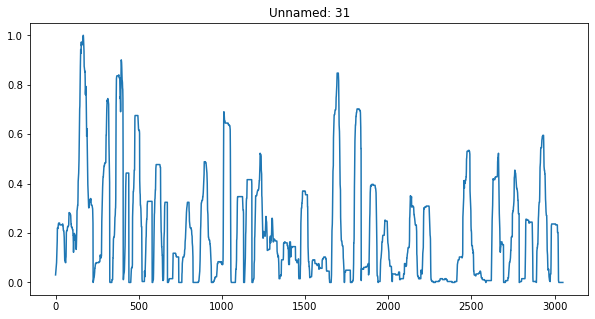

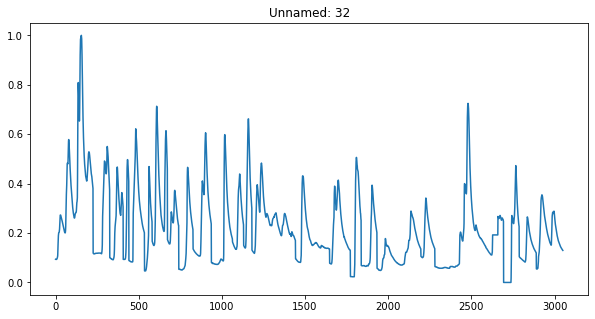

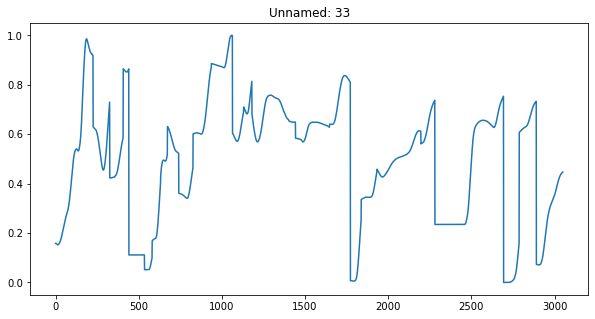

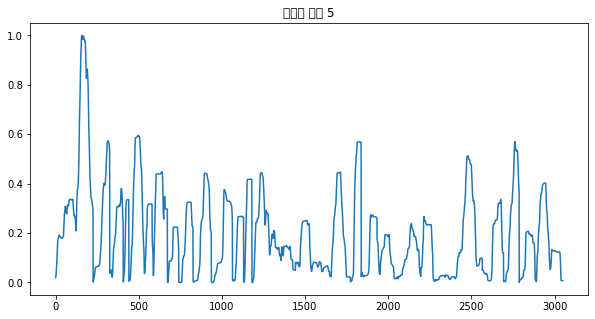

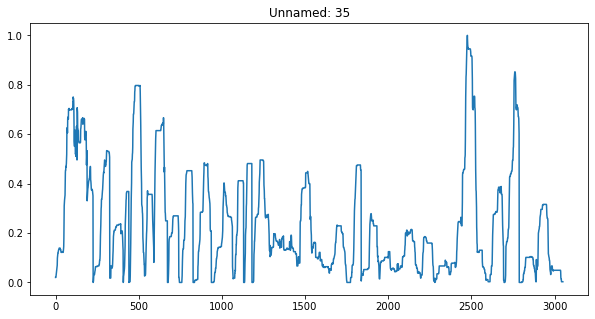

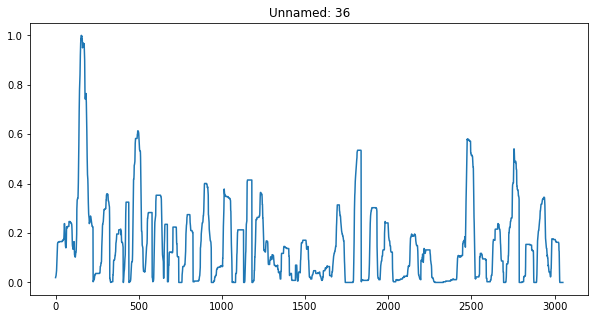

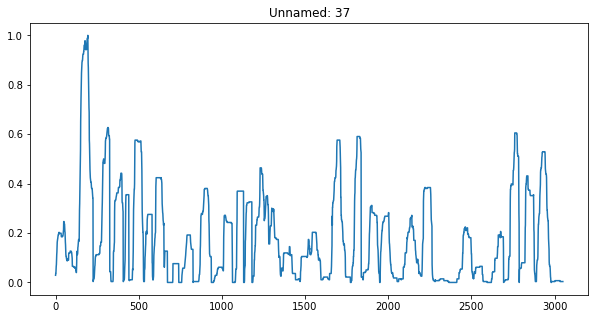

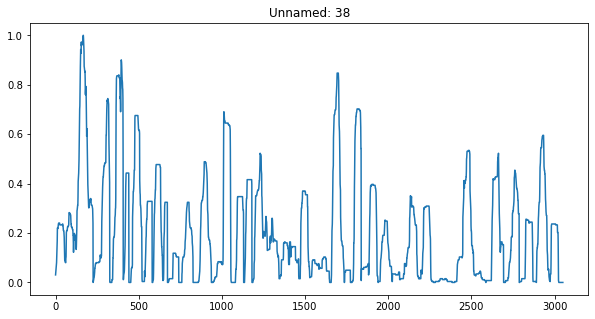

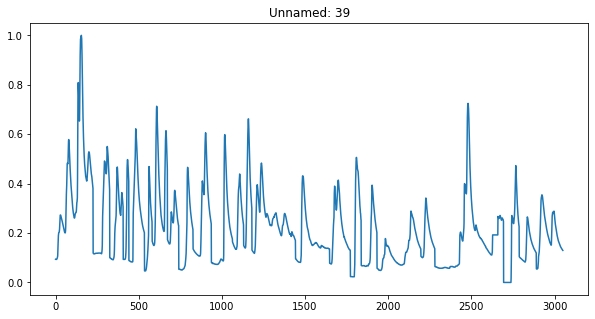

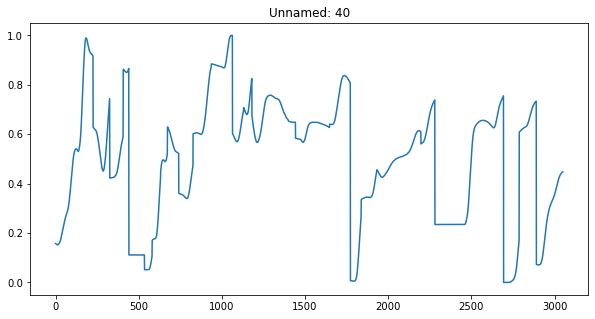

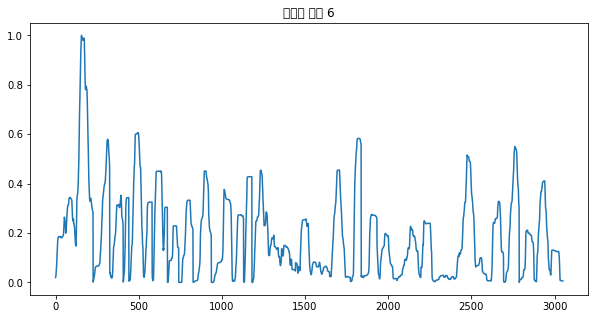

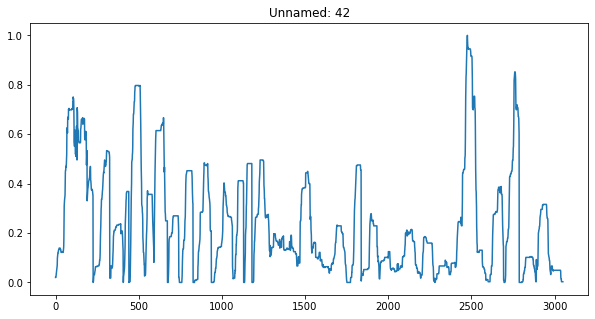

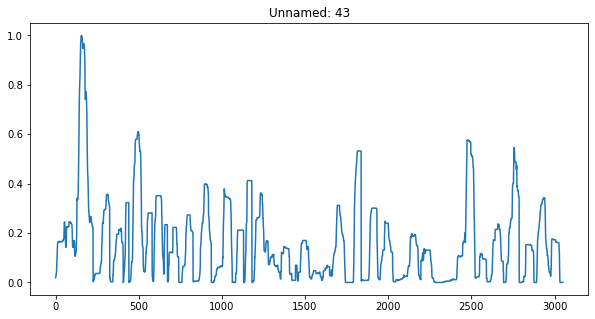

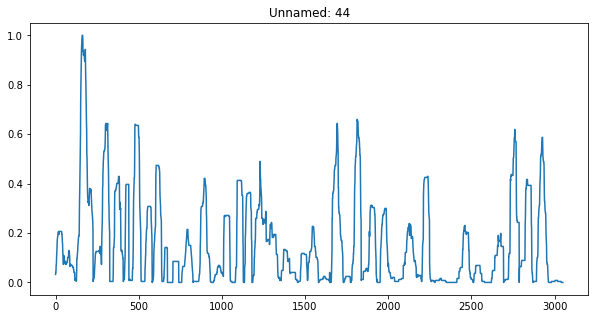

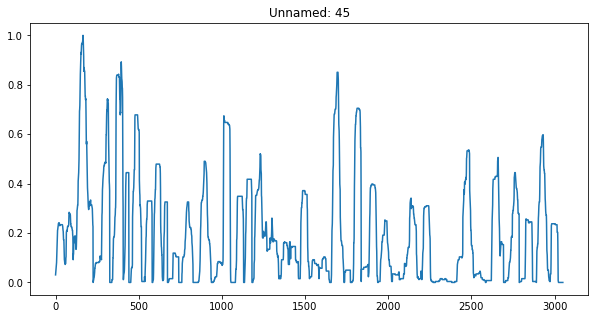

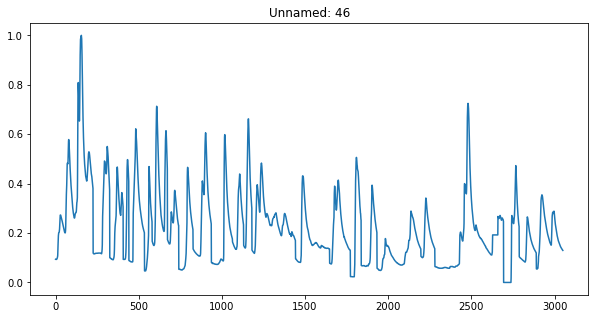

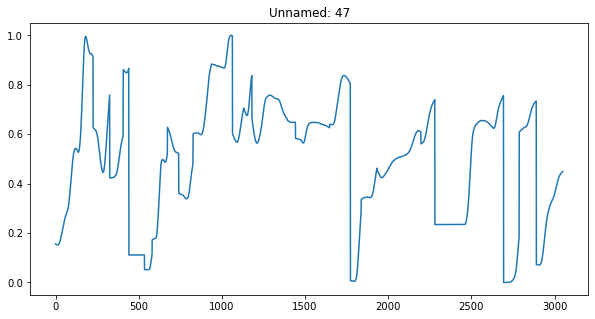

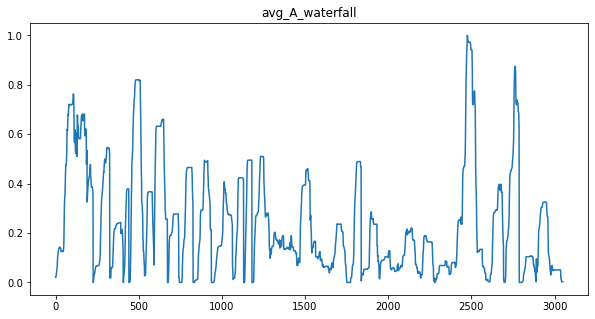

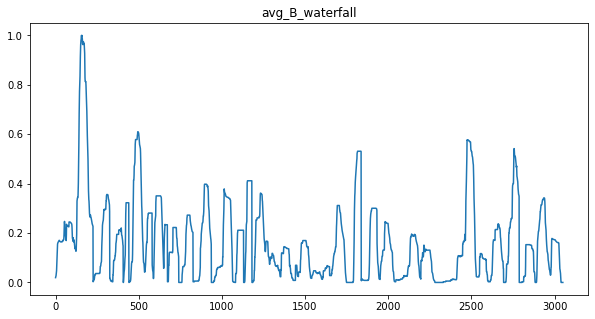

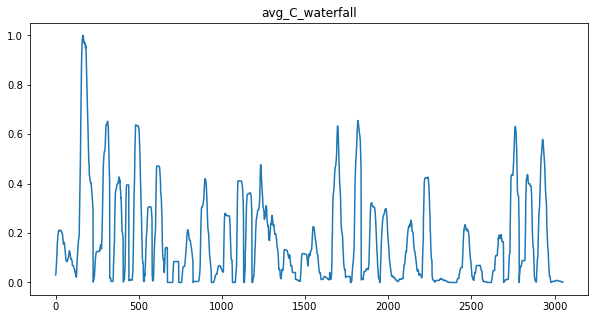

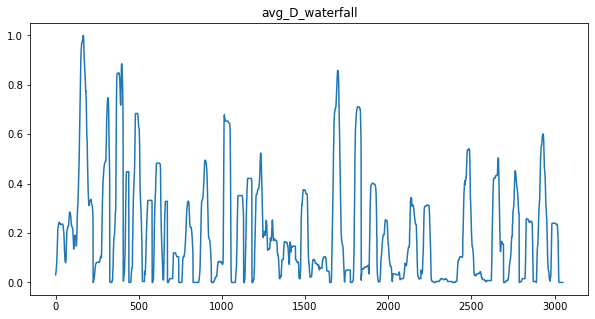

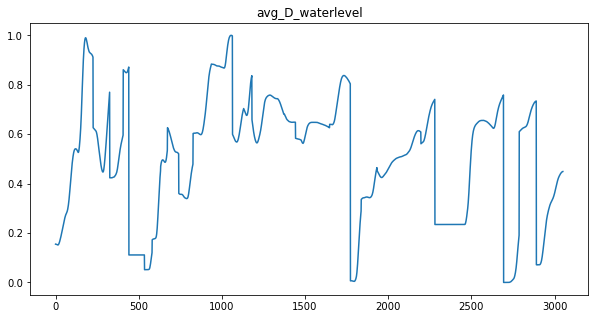

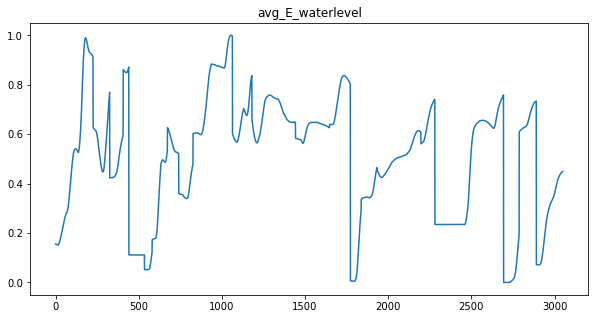

In [60]:
feature_list = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel']
for sth in feature_list:
    plt.figure(figsize = (10,5))
    plt.plot(df[sth])
    plt.title(sth)

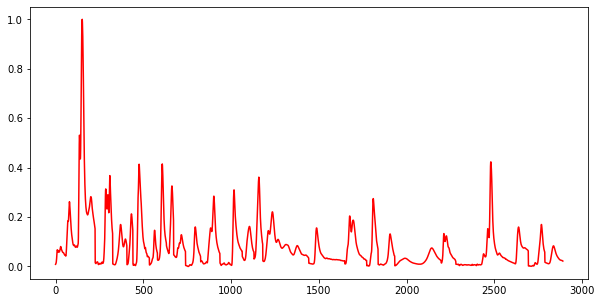

In [61]:
plt.figure(figsize = (10,5))
plt.plot(df['유입량'], color = 'red')

과연 진짜 시간을 무시하는 것이 제일 좋은 것일까 ? 시간에 따라서 언제는 비 많이 오고, 언제는 비 적게 오고 이러한 패턴이 있을수도 있다... 고로 내 생각에는 시간을 넣는 것이 상당히 중요할 것이라고 생각이 든다. 

In [62]:
df =df.drop(['연','월','일','시간'], axis = 1)
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-7-10 7:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.155043,0.155043
1,1,2006-7-10 8:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.154919,0.154919
2,1,2006-7-10 9:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.154795,0.154795
3,1,2006-7-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.154719,0.154719
4,1,2006-7-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.154507,0.154507


In [63]:
df['date']=pd.to_datetime(df['date'],format = "%Y-%m-%d %H")

In [48]:
df = pd.read_excel('rain_data_drop_scaled_datetime.xlsx')
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-7-10 8:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.155043,0.155043
1,1,2006-7-10 9:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.154919,0.154919
2,1,2006-7-10 10:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.154795,0.154795
3,1,2006-7-10 11:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.154719,0.154719
4,1,2006-7-10 12:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.154507,0.154507
